<a href="https://colab.research.google.com/github/Cindy202411/5m-data-1.1-intro-data-science/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.22.1
!pip install transformers scipy ftfy accelerate
!pip uninstall jax
!pip install --upgrade diffusers[torch]
!pip install torch==2.5.1


  Using cached diffusers-0.22.1-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.22.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.33.1
    Uninstalling diffusers-0.33.1:
      Successfully uninstalled diffusers-0.33.1


  Using cached diffusers-0.33.1-py3-none-any.whl.metadata (19 kB)
Using cached diffusers-0.33.1-py3-none-any.whl (3.6 MB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.22.1
    Uninstalling diffusers-0.22.1:
      Successfully uninstalled diffusers-0.22.1


In [ ]:
import torch

In [ ]:
from diffusers import StableDiffusionPipeline

In [ ]:
model = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
# # pipe = pipe.to("cuda")
# # prompt = input("image : ")


In [ ]:
model = model.to("cuda")

In [ ]:
q = input("image : ")

image : fox


In [ ]:
img = model(q).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

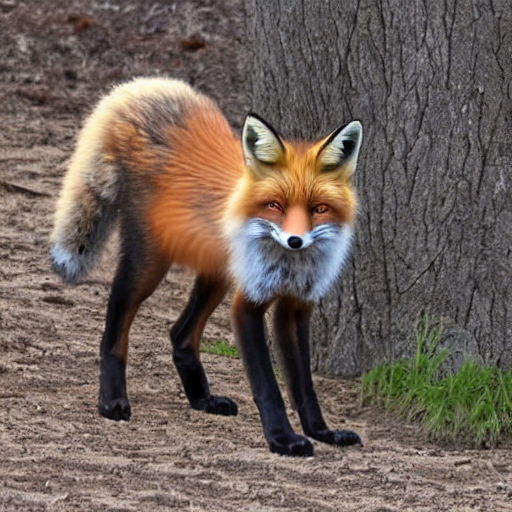

In [ ]:
img

In [ ]:
from google.colab import userdata
telegram_api_key = userdata.get('telegram_api_key')

In [ ]:
import requests,time

In [ ]:
url = f'https://api.telegram.org/bot{telegram_api_key}'

In [ ]:
r = requests.get(url+'/getUpdates')

In [ ]:
r = r.json()

In [ ]:
chat_id = r["result"][-1]["message"]["chat"]["id"]

In [ ]:
r = requests.get(url+f'/sendMessage?chat_id={chat_id}&text={"image : "}')

In [ ]:
image_path = "/content/drive/My Drive/image.png"

In [ ]:
image_caption = "stable-diffusion"

In [ ]:
data = {"chat_id": chat_id, "caption": image_caption}

In [ ]:
url2 = f'https://api.telegram.org/bot{telegram_api_key}/sendPhoto?chat_id={chat_id}'

In [ ]:
with open("/content/img.png","rb") as f:
  ret = requests.post(url2,files={"photo":f},data=data)

In [ ]:
img.save("/content/img.png")

In [ ]:
image_caption = "stable-diffusion"

In [ ]:
data = {"chat_id":chat_id,"caption":image_caption}

In [ ]:
# firstmsgid=0
# while True:
#     r=requests.get(url+f"/sendMessage?chat_id={chat_id}&text={'question: (or type quite)'}")

#     while True:
#         r1=requests.get(url+"/getUpdates")
#         time.sleep(1)
#         #print(r.json())
#         r1=r1.json()
#         r1=r1["result"][-1]['message']
#         q=r1['text']
#         msg_id=r1['message_id']

#         if firstmsgid==0:
#           firstmsgid=msg_id
#           print(f"firstid={firstmsgid}")
#           continue
#         elif firstmsgid<msg_id:
#           print(f"B msg={q}")
#           firstmsgid=msg_id
#           break

#     if str.lower(q)=='quit':
#         print(f"msg={q}")
#         break
#     else:
#         r2=model.generate_content(q)
#         r2=requests.get(url+f"/sendMessage?chat_id={chat_id}&text={r2.text}")
# print("End")

firstid=159
B msg=rose


AttributeError: 'StableDiffusionPipeline' object has no attribute 'generate_content'

In [ ]:
firstmsgid=0
while True:
    r=requests.get(url+f"/sendMessage?chat_id={chat_id}&text={'question: (or type quite)'}")

    while True:
        r1=requests.get(url+"/getUpdates")
        time.sleep(1)
        #print(r.json())
        r1=r1.json()
        r1=r1["result"][-1]['message']
        q=r1['text']
        msg_id=r1['message_id']

        if firstmsgid==0:
          firstmsgid=msg_id
          print(f"firstid={firstmsgid}")
          continue
        elif firstmsgid<msg_id:
          print(f"B msg={q}")
          firstmsgid=msg_id
          break
           if str.lower(q)=='quit':
        print(f"msg={q}")
        break
    else:
      image = model(q).images[0]
      image.save("/content/img.png")
      image_caption="stable-diffusion"
      data={"chat_id":chat_id,"caption":image_caption}
      #r2=model.generate_content(q)
      url2=url+f"/sendPhoto?chat_id={chat_id}"
      with open("/content/img.png", "rb") as f:
        ret=requests.post(url2, files={"photo":f}, data=data)
      ret.json()
print("End")


IndentationError: unexpected indent (<ipython-input-57-28fc4a312efd>, line 22)

# New section